In [138]:
import numpy as np
import pandas as pd
# from xgboost import XGBRegressor
# import shap
import seaborn as sns
import sys
sys.path.insert(0, '../data_prep')
from sqlite_utils import select_statement_to_df, df_to_table, table_to_df
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

In [2]:
pred_df = table_to_df(table_name='FILM_ALGO_SCORE')
pred_df['EITHER_SCORE'] = (pred_df['FILM_RATING_SCALED'].fillna(0) / 5) + (pred_df['ALGO_SCORE'].fillna(0))
pred_df['RATED'] = np.where(pred_df['FILM_RATING_SCALED'].isnull(), 0, 1)
pred_df.sort_values('ALGO_SCORE', ascending=False)

,FILM_ID,FILM_TITLE,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,FANS_PER_WATCH,FILM_RUNTIME,FILM_YEAR,DIRECTOR_MEAN_RATING,...,WINTER,WITCH,WITCHCRAFT,WIZARD,WOODS,ZOMBIE,FILM_RATING_SCALED,ALGO_SCORE,EITHER_SCORE,RATED
315,f_08i7u,Sicario,771339,266.0,3.97,0.290466,0.005878,122,2015,4.466131,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.000000,1.000000,0
14,f_021ew,No Country for Old Men,1617859,108.0,4.33,0.364213,0.017921,122,2007,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.970064,0.970064,0
644,f_02a4A,The Lives of Others,189393,163.0,4.27,0.271325,0.010972,137,2006,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.970064,0.970064,0
19,f_029eY,Dr. Strangelove or: How I Learned to Stop Worr...,600365,130.0,4.31,0.340826,0.016608,95,1964,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.970064,0.970064,0
16,f_029zs,Se7en,2442369,107.0,4.33,0.393791,0.019460,127,1995,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.970064,0.970064,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17480,f_01VWi,Dinosaur,212852,266.0,2.88,0.103349,0.000926,82,2000,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,2.402893,NaN,0.480579,1
17481,f_01YbO,The Negotiator,69683,266.0,3.49,0.160871,0.001033,140,1998,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,3.221042,NaN,0.644208,1
17482,f_0jEVy,Fantasy Island,97081,266.0,1.74,0.065080,0.000124,109,2020,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,1.889344,NaN,0.377869,1
17483,f_0z7to,The Devil's Bath,3669,266.0,3.48,0.236032,0.001635,120,2024,3.638328,...,0.0,0.0,0.0,0.0,0.0,0.0,3.262270,NaN,0.652454,1


In [3]:
shap_df = table_to_df(table_name='FILM_SHAP_VALUES')
shap_df

,FILM_ID,BASE_VALUE,FILM_RATING,LIKES_PER_WATCH,DIRECTOR_MEAN_RATING,DIRECTOR_PERCENT_WATCHED,ACTION,ADVENTURE,ANIMATION,COMEDY,...,SUPERNATURAL POWER,SURVIVAL HORROR,VIDEO NASTY,VILLAIN,WHODUNIT,WINTER,WITCH,WOODS,ZOMBIE,PREDICTION
0,f_0t4EQ,0.523577,-0.093537,0.002063,-0.001386,0.002156,-0.004930,-0.002026,0.000988,-0.014949,...,5.230219e-20,-0.000632,0.000931,-0.002323,0.000070,0.000080,0.000430,-0.000504,7.155686e-19,0.376880
1,f_02aNK,0.606435,0.213599,-0.003391,-0.001606,-0.001335,-0.005710,-0.002346,0.001144,0.007072,...,6.057911e-20,-0.000732,0.001078,-0.002691,0.000081,0.000093,0.000497,-0.000584,8.288087e-19,0.770706
2,f_02aNq,0.607510,0.220989,-0.002659,-0.001609,-0.001337,-0.005720,-0.002351,0.001146,0.007085,...,6.068654e-20,-0.000733,0.001080,-0.002696,0.000082,0.000093,0.000498,-0.000585,8.302785e-19,0.779822
3,f_02axi,0.612951,0.226505,-0.003199,-0.001623,-0.002582,0.024604,-0.002372,0.001156,0.007148,...,6.123005e-20,-0.000740,0.001090,-0.002720,0.000082,0.000094,0.000503,-0.000590,8.377144e-19,0.828893
4,f_02aq2,0.612586,0.210464,-0.001613,0.019557,0.000514,-0.005768,-0.002370,0.001155,0.007144,...,6.119363e-20,-0.000740,0.001089,-0.002718,0.000082,0.000094,0.000503,-0.000590,8.372162e-19,0.825442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16275,f_0nB0M,0.465930,-0.178683,0.000790,-0.001234,-0.002411,0.018703,-0.001803,0.000879,-0.013303,...,4.654357e-20,-0.000563,0.000828,-0.002068,0.000063,0.000071,0.000382,-0.000448,6.367824e-19,0.257655
16276,f_06FA6,0.564339,-0.045460,-0.000283,-0.001494,-0.002337,-0.005314,-0.002184,0.001064,0.006581,...,5.637406e-20,-0.000681,0.001003,-0.002504,0.000076,0.000086,0.000463,-0.000543,7.712776e-19,0.516371
16277,f_01vd2,0.539943,-0.098019,0.001901,-0.001430,-0.002236,-0.005084,-0.002089,0.001018,0.006297,...,5.393702e-20,-0.000652,0.000960,-0.002396,0.000073,0.000083,0.000443,-0.000520,7.379355e-19,0.425065
16278,f_03tJO,0.542513,-0.092224,0.002026,-0.001437,-0.002247,-0.005108,-0.002099,0.001023,0.006327,...,5.419379e-20,-0.000655,0.000964,-0.002407,0.000073,0.000083,0.000445,-0.000522,7.414483e-19,0.433465


In [67]:
def get_valid_cols(film_id, min_shap_val=0.001):
    filmid_shap_df = shap_df[shap_df['FILM_ID']==film_id].reset_index(drop=True)
    valid_cols = []
    for col in filmid_shap_df.columns:
        shap_val = filmid_shap_df[col][0]
        if isinstance(shap_val, str):
            col_valid = False
        elif np.isnan(shap_val):
            col_valid = False
        elif abs(shap_val) < min_shap_val:
            col_valid = False
        elif col == 'BASE_VALUE':
            col_valid = True
        else:
            col_valid = True
        if col_valid:
            valid_cols.append(col)
    return valid_cols

In [68]:
def create_dual_df(film_id, valid_cols):
    film_title = pred_df[pred_df['FILM_ID']==film_id]['FILM_TITLE'].values[0]
    dual_df = pd.concat([pred_df[pred_df['FILM_ID']==film_id], shap_df[shap_df['FILM_ID']==film_id]])
    dual_df['FILM_TITLE'] = dual_df['FILM_TITLE'].fillna(film_title)
    dual_df['ALGO_SCORE'] = dual_df['ALGO_SCORE'].fillna(dual_df['ALGO_SCORE'].max())
    dual_df = dual_df[valid_cols]
    dual_df.insert(2, 'INFO', ['FEATURE_VALUE', 'SHAP_VALUE'])
    dual_df = dual_df.reset_index(drop=True)
    return dual_df

In [69]:
def return_comparison_df(film_ids, min_shap_val=0.001, decimal_places=3):
    valid_cols = [get_valid_cols(x, min_shap_val=min_shap_val) for x in film_ids]
    valid_cols = list(set([col for valid_col_list in valid_cols for col in valid_col_list]))
    valid_cols = ['FILM_ID', 'FILM_TITLE', 'ALGO_SCORE'] + valid_cols
    valid_cols = [x for x in pred_df.columns if x in valid_cols]
    valid_cols.append('BASE_VALUE')
    all_dfs = []
    for n, film_id in enumerate(film_ids):
        dual_df = create_dual_df(film_id, valid_cols)
        melted_df = pd.melt(dual_df, id_vars=['FILM_ID', 'FILM_TITLE', 'INFO'])
        pivoted_df = melted_df.drop('FILM_ID', axis=1).pivot(index='variable', columns=['FILM_TITLE', 'INFO'], values='value').reset_index()
        pivoted_df.columns = [' '.join(col) for col in pivoted_df.columns]
        if n > 0:
            pivoted_df = pivoted_df.drop('variable ', axis=1)
        all_dfs.append(pivoted_df)
    comparison_df = pd.concat(all_dfs, axis=1)
    if len(film_ids) > 1:
        comparison_df['VAR'] = comparison_df[comparison_df.columns[2]] - comparison_df[comparison_df.columns[4]]
        comparison_df['ABS_VAR'] = comparison_df['VAR'].abs()
        comparison_df = comparison_df.sort_values('ABS_VAR', ascending=False)
    else:
        comparison_df = comparison_df.sort_values(comparison_df.columns[2], ascending=False)
    return comparison_df.round(decimal_places)

,FILM_ID,FILM_RATING,ALGO_SCORE,FILM_RATING_SHAP
0,f_0t4EQ,2.70,0.398649,-0.053688
1,f_02aNK,4.55,0.858232,0.191207
2,f_02aNq,4.59,0.853215,0.198396
3,f_02axi,4.60,0.936311,0.187450
4,f_02b0k,4.46,0.897176,0.139371
...,...,...,...,...
15059,f_03FYm,3.15,0.589475,-0.020993
15060,f_0eARi,3.83,0.611151,0.048670
15061,f_0mhoC,2.75,0.348439,-0.027926
15062,f_030o8,2.62,0.417685,-0.107843


c:\Users\tomdevine\Desktop\dev\PersonalProjects\letterboxd-app\letterboxd-env\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='FILM_RATING', ylabel='FILM_RATING_SHAP'>

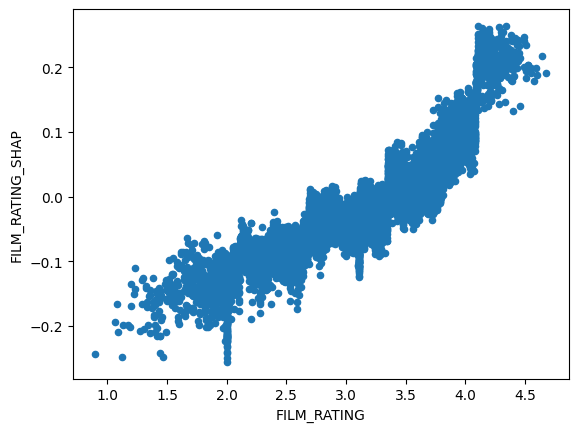

In [70]:
select_a_feature = 'FILM_RATING'
shap_df_feature = shap_df[['FILM_ID', select_a_feature]]
shap_df_feature.columns = ['FILM_ID', select_a_feature+'_SHAP']
pred_df_feature = pred_df[['FILM_ID', select_a_feature, 'ALGO_SCORE']]
feature_df = pred_df_feature.merge(shap_df_feature, how='left', on='FILM_ID')
feature_df = feature_df.dropna()
feature_df = feature_df[feature_df['FILM_RATING'] > 0]
display(feature_df)
feature_df.plot(kind='scatter', x=select_a_feature, y=select_a_feature+'_SHAP')

<Axes: xlabel='FILM_RATING', ylabel='PREDICTION'>

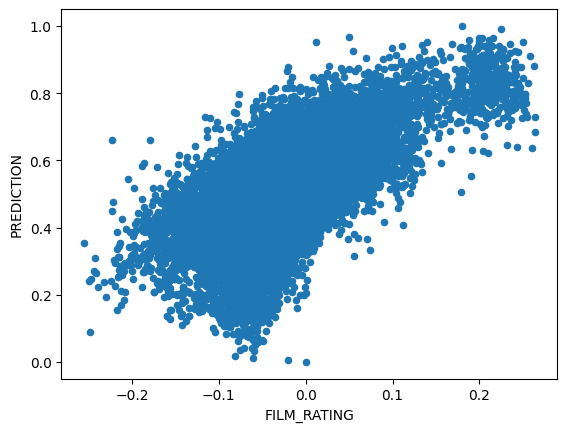

In [71]:
shap_df.plot(kind='scatter', x='FILM_RATING', y='PREDICTION')

<Axes: xlabel='FILM_RATING', ylabel='EITHER_SCORE'>

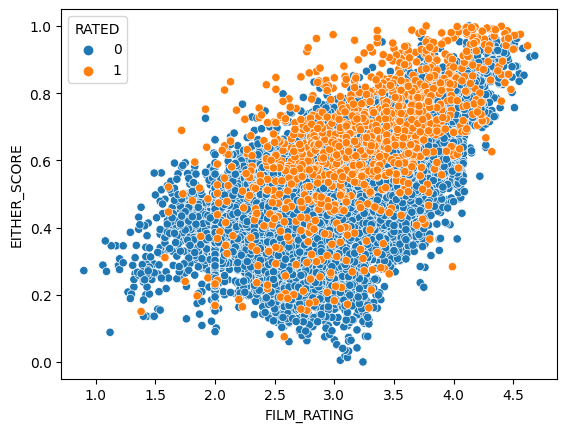

In [72]:
sns.scatterplot(pred_df, x='FILM_RATING', y='EITHER_SCORE', hue='RATED')

<Axes: xlabel='LIKES_PER_WATCH', ylabel='EITHER_SCORE'>

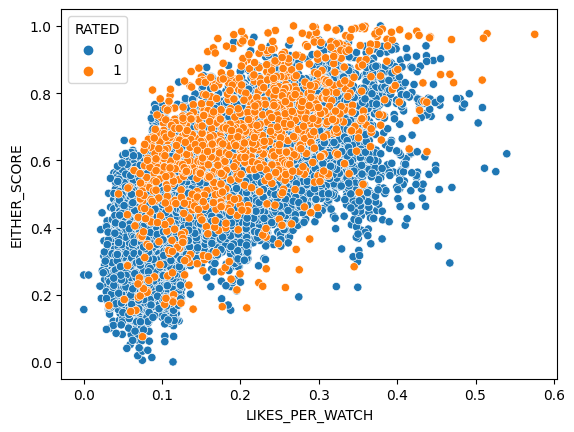

In [73]:
sns.scatterplot(pred_df, x='LIKES_PER_WATCH', y='EITHER_SCORE', hue='RATED')

In [74]:
pred_df

,FILM_ID,FILM_TITLE,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,FANS_PER_WATCH,FILM_RUNTIME,FILM_YEAR,DIRECTOR_MEAN_RATING,...,UNDEAD,VIDEO NASTY,VIRTUAL REALITY,WHODUNIT,WITCHCRAFT,WOODS,FILM_RATING_SCALED,ALGO_SCORE,EITHER_SCORE,RATED
0,f_0t4EQ,Death to 2020,82977,266.0,2.70,0.110705,0.000024,71,2020,3.526826,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.398649,0.398649,0
1,f_02aNK,The Godfather,1898408,9.0,4.55,0.396017,0.030761,175,1972,3.526826,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.858232,0.858232,0
2,f_02aNq,The Godfather: Part II,1035015,5.0,4.59,0.358109,0.022647,202,1974,3.526826,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.853215,0.853215,0
3,f_02axi,Seven Samurai,350868,4.0,4.60,0.381517,0.026092,207,1954,3.526826,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.936311,0.936311,0
4,f_02b0k,The Dark Knight,3259752,23.0,4.46,0.446109,0.023643,152,2008,4.028507,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.897176,0.897176,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16125,f_01X6e,13 Going on 30,1007004,266.0,3.55,0.253698,0.010106,98,2004,3.526826,...,0.0,0.0,0.0,0.0,0.0,0.0,2.518519,NaN,0.503704,1
16126,f_0wMAk,Marcel the Shell with Shoes On,269687,217.0,4.23,0.437778,0.018151,90,2021,3.526826,...,0.0,0.0,0.0,0.0,0.0,0.0,3.864525,NaN,0.772905,1
16127,f_00psI,Mission: Impossible – Ghost Protocol,530924,266.0,3.71,0.218374,0.000816,133,2011,3.695436,...,0.0,0.0,0.0,0.0,0.0,0.0,3.722028,NaN,0.744406,1
16128,f_05rI4,Mission: Impossible – Rogue Nation,531800,266.0,3.71,0.218520,0.000829,131,2015,3.526826,...,0.0,0.0,0.0,0.0,0.0,0.0,3.808659,NaN,0.761732,1


In [4]:
all_features_query = """

WITH BASE_TABLE AS (
    
      SELECT
      
        a.FILM_ID
        ,c.FILM_TITLE
        ,d.FILM_GENRE
        ,e.FILM_RATING
        ,f.FILM_RATING_SCALED
        ,CASE WHEN f.FILM_RATING_SCALED IS NOT NULL THEN 1 ELSE 0 END AS RATED
      
      FROM ALL_FILMS a
      LEFT JOIN CONTENT_TYPE b
      ON a.FILM_ID = b.FILM_ID
      LEFT JOIN FILM_TITLE c
      ON a.FILM_ID = c.FILM_ID
      LEFT JOIN FILM_GENRE d
      ON a.FILM_ID = d.FILM_ID
      LEFT JOIN FILM_LETTERBOXD_STATS e
      ON a.FILM_ID = e.FILM_ID
      LEFT JOIN PERSONAL_RATING f
      ON a.FILM_ID = f.FILM_ID
      
      WHERE CONTENT_TYPE = 'movie'
      
    )
   
    SELECT

      a.FILM_ID
      ,b.FILM_TITLE
      ,c.FILM_WATCH_COUNT
      ,g.TOP_250_POSITION AS FILM_TOP_250
      ,c.FILM_RATING
      ,COALESCE(1.0*c.FILM_LIKES_COUNT/c.FILM_WATCH_COUNT, 0.0) AS LIKES_PER_WATCH
      ,COALESCE(1.0*c.FILM_FAN_COUNT/c.FILM_WATCH_COUNT, 0.0) AS FANS_PER_WATCH
      ,d.FILM_RUNTIME
      ,f.FILM_YEAR
      ,e.ALL_FILM_GENRES
    
    FROM ALL_FEATURE_FILMS a
    LEFT JOIN FILM_TITLE b
    ON a.FILM_ID = b.FILM_ID
    LEFT JOIN FILM_LETTERBOXD_STATS c
    ON a.FILM_ID = c.FILM_ID
    LEFT JOIN FILM_RUNTIME d
    ON a.FILM_ID = d.FILM_ID
    LEFT JOIN FILM_GENRE e
    ON a.FILM_ID = e.FILM_ID
    LEFT JOIN FILM_YEAR f
    ON a.FILM_ID = f.FILM_ID
    LEFT JOIN FILM_LETTERBOXD_TOP_250 g
    ON a.FILM_ID = g.FILM_ID

"""

keyword_query = """

WITH BASE_TABLE AS (
    
    SELECT
    
        a.FILM_ID
        ,c.FILM_TITLE
        ,d.KEYWORD
        ,d.KEYWORD_ID
        ,e.FILM_RATING
        ,f.FILM_RATING_SCALED
        ,CASE WHEN f.FILM_RATING_SCALED IS NOT NULL THEN 1 ELSE 0 END AS RATED
    
    FROM ALL_FEATURE_FILMS a
    LEFT JOIN CONTENT_TYPE b
    ON a.FILM_ID = b.FILM_ID
    LEFT JOIN FILM_TITLE c
    ON a.FILM_ID = c.FILM_ID
    LEFT JOIN FILM_KEYWORDS d
    ON a.FILM_ID = d.FILM_ID
    LEFT JOIN FILM_LETTERBOXD_STATS e
    ON a.FILM_ID = e.FILM_ID
    LEFT JOIN PERSONAL_RATING f
    ON a.FILM_ID = f.FILM_ID
    
    WHERE b.CONTENT_TYPE = 'movie'
    
    )
    
, SCORE_TABLE AS (

    SELECT

    KEYWORD_ID
    ,KEYWORD
    ,COUNT(*) AS KEYWORD_COUNT
    ,SUM(RATED) AS MY_RATING_COUNT
    
    FROM BASE_TABLE
    
    GROUP BY KEYWORD
    
    HAVING KEYWORD_COUNT >= 1
    AND MY_RATING_COUNT >= 1
)

SELECT
    a.FILM_ID
    ,a.KEYWORD_ID
    ,b.KEYWORD
    
FROM FILM_KEYWORDS a
LEFT JOIN SCORE_TABLE b
ON a.KEYWORD_ID = b.KEYWORD_ID

WHERE b.KEYWORD_ID IS NOT NULL

"""
top_actor_film_level_query = """

WITH BASE_TABLE AS (

    SELECT

        a.FILM_ID
        ,d.FILM_TITLE
        ,b.PERSON_ID
        ,e.PERSON_NAME AS ACTOR_NAME
        ,CASE WHEN c.FILM_ID IS NULL THEN 0 ELSE 1 END AS WATCHED
        ,CASE WHEN f.FILM_RATING_SCALED IS NOT NULL THEN 1 ELSE 0 END AS RATED
        ,f.FILM_RATING_SCALED

    FROM ALL_FEATURE_FILMS a
    
    LEFT JOIN FILM_CAST b
    ON a.FILM_ID = b.FILM_ID
    
    LEFT JOIN WATCHED c
    ON a.FILM_ID = c.FILM_ID
    
    LEFT JOIN FILM_TITLE d
    ON a.FILM_ID = d.FILM_ID

    LEFT JOIN PERSON_INFO e
    ON b.PERSON_ID = e.PERSON_ID

    LEFT JOIN PERSONAL_RATING f
    ON a.FILM_ID = f.FILM_ID

    WHERE e.PERSON_NAME IS NOT NULL
    
    )
    
, ACTOR_TABLE AS (

    SELECT

    PERSON_ID
    ,SUM(RATED) AS TOTAL_RATED
    
    FROM BASE_TABLE
    
    GROUP BY PERSON_ID
    
    HAVING TOTAL_RATED >= 1
)

SELECT
    
     a.FILM_ID
    ,a.PERSON_ID
    ,a.ACTOR_NAME
    ,1 AS ACTOR_IN_FILM
    
FROM BASE_TABLE a
INNER JOIN ACTOR_TABLE b
ON a.PERSON_ID = b.PERSON_ID

"""

top_director_film_level_query = """

WITH BASE_TABLE AS (

    SELECT

        a.FILM_ID
        ,d.FILM_TITLE
        ,b.PERSON_ID
        ,e.PERSON_NAME AS DIRECTOR_NAME
        ,CASE WHEN c.FILM_ID IS NULL THEN 0 ELSE 1 END AS WATCHED
        ,CASE WHEN f.FILM_RATING_SCALED IS NOT NULL THEN 1 ELSE 0 END AS RATED
        ,f.FILM_RATING_SCALED

    FROM ALL_FEATURE_FILMS a
    
    LEFT JOIN FILM_CREW b
    ON a.FILM_ID = b.FILM_ID
    
    LEFT JOIN WATCHED c
    ON a.FILM_ID = c.FILM_ID
    
    LEFT JOIN FILM_TITLE d
    ON a.FILM_ID = d.FILM_ID

    LEFT JOIN PERSON_INFO e
    ON b.PERSON_ID = e.PERSON_ID

    LEFT JOIN PERSONAL_RATING f
    ON a.FILM_ID = f.FILM_ID

    WHERE e.PERSON_NAME IS NOT NULL
    AND b.JOB = 'Director'
    
    )
    
, DIRECTOR_TABLE AS (

    SELECT

    PERSON_ID
    ,SUM(RATED) AS TOTAL_RATED
    
    FROM BASE_TABLE
    
    GROUP BY PERSON_ID
    
    HAVING TOTAL_RATED >= 1
)

SELECT
    
     a.FILM_ID
    ,a.PERSON_ID
    ,a.DIRECTOR_NAME
    ,1 AS DIRECTOR_OF_FILM
    
FROM BASE_TABLE a
INNER JOIN DIRECTOR_TABLE b
ON a.PERSON_ID = b.PERSON_ID

"""

my_rating_query = """

    SELECT
         FILM_ID
        ,FILM_RATING_SCALED
    FROM PERSONAL_RATING

"""

In [5]:
num_neighbours = 10

eligible_watchlist_df = select_statement_to_df(all_features_query)
eligible_watchlist_df = pd.concat([eligible_watchlist_df, eligible_watchlist_df['ALL_FILM_GENRES'].str.get_dummies(sep='/')], axis=1).drop('ALL_FILM_GENRES', axis=1)
keyword_df = select_statement_to_df(keyword_query)
keyword_df['COUNT'] = 1
keyword_df_wide = pd.pivot_table(keyword_df, values='COUNT', index=['FILM_ID'], columns=['KEYWORD']).fillna(0).reset_index()
eligible_watchlist_df = eligible_watchlist_df.merge(keyword_df_wide, how='left', on='FILM_ID')
top_actor_film_level_df = select_statement_to_df(top_actor_film_level_query)
actor_lookup_df = top_actor_film_level_df.groupby(['PERSON_ID', 'ACTOR_NAME']).count().reset_index()
actor_lookup_dict = {id:name for id, name in zip(actor_lookup_df['PERSON_ID'], actor_lookup_df['ACTOR_NAME'])}
top_actor_film_level_df_wide = pd.pivot_table(top_actor_film_level_df, values='ACTOR_IN_FILM', index=['FILM_ID'], columns='PERSON_ID').fillna(0)
top_actor_film_level_df_wide.columns = [actor_lookup_dict.get(x, x)+'_'+str(x)+'_actor' for x in top_actor_film_level_df_wide.columns]
top_director_film_level_df = select_statement_to_df(top_director_film_level_query)
director_lookup_df = top_director_film_level_df.groupby(['PERSON_ID', 'DIRECTOR_NAME']).count().reset_index()
director_lookup_dict = {id:name for id, name in zip(director_lookup_df['PERSON_ID'], director_lookup_df['DIRECTOR_NAME'])}
top_director_film_level_df_wide = pd.pivot_table(top_director_film_level_df, values='DIRECTOR_OF_FILM', index=['FILM_ID'], columns='PERSON_ID').fillna(0)
top_director_film_level_df_wide.columns = [director_lookup_dict.get(x, x)+'_'+str(x)+'_director' for x in top_director_film_level_df_wide.columns]
eligible_watchlist_df = eligible_watchlist_df.merge(top_actor_film_level_df_wide, how='left', on='FILM_ID').fillna(0)
eligible_watchlist_df = eligible_watchlist_df.merge(top_director_film_level_df_wide, how='left', on='FILM_ID').fillna(0)
eligible_watchlist_df['FILM_TOP_250'] = eligible_watchlist_df['FILM_TOP_250'].fillna(266)
eligible_watchlist_df['FILM_RATING'] = eligible_watchlist_df['FILM_RATING'].fillna(2.0)
eligible_watchlist_df = eligible_watchlist_df.fillna(0)
my_rating_df = select_statement_to_df(my_rating_query)
rating_features_df = eligible_watchlist_df.merge(my_rating_df, how='left', on='FILM_ID')
rated_features = rating_features_df[rating_features_df['FILM_RATING_SCALED'].notnull()].reset_index(drop=True)
unrated_features = rating_features_df[rating_features_df['FILM_RATING_SCALED'].isnull()].reset_index(drop=True)
non_features = ['FILM_ID',
                'FILM_TITLE',
                'FILM_RATING_SCALED',
                'FILM_RATING',
                'FILM_RUNTIME',
                'FILM_WATCH_COUNT',
                'FILM_FAN_COUNT',
                'LIKES_PER_WATCH',
                'FILM_YEAR',
                'FILM_TOP_250',
                'DIRECTOR_MEAN_RATING',
                'DIRECTOR_TOTAL_FILMS',
                'DIRECTOR_PERCENT_WATCHED',
                'EITHER_SCORE',
                'RATED',
                'ALGO_SCORE'
                ]
model_features = [x for x in unrated_features.columns if x not in non_features]
delete_cols = []
for col in model_features:
    col_mean = rated_features[col].mean()
    if col_mean <= .005:
        delete_cols.append(col)
model_features = [x for x in model_features if x not in delete_cols]
target = ['FILM_RATING_SCALED']
X_train = rated_features[model_features]
y_train = rated_features[target]
model_features = [x for x in model_features if x not in delete_cols]
target = ['FILM_RATING_SCALED']
X_train = rated_features[model_features]
y_train = rated_features[target]
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

knn = KNeighborsRegressor(n_neighbors=num_neighbours)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [6]:
X_pred = unrated_features[model_features]
X_pred = scaler.transform(X_pred)
pred_df2 = unrated_features.copy()
pred_df2['ALGO_SCORE2'] = knn.predict(X_pred)

In [7]:
pred_df2.sort_values('ALGO_SCORE2', ascending=False)

,FILM_ID,FILM_TITLE,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,FANS_PER_WATCH,FILM_RUNTIME,FILM_YEAR,action,...,Rapman_2380389_director,Gerard Bush_2399829_director,Christopher Renz_2399830_director,Andrew Hunt_2441040_director,Kemp Powers_2451598_director,Michael Sarnoski_2580328_director,Joseph Daniel Thomas_2628072_director,Junta Yamaguchi_3008307_director,FILM_RATING_SCALED,ALGO_SCORE2
5047,f_02wRk,Ice Age: The Meltdown,751621,0.0,3.06,0.087319,0.000204,91,2006,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.967314
639,f_029ho,Cars,1715058,0.0,3.71,0.193866,0.008529,117,2006,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.908179
817,f_01VZQ,The Hunchback of Notre Dame,533659,0.0,3.67,0.162525,0.003156,91,1996,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.878615
101,f_09vE4,Avengers: Endgame,3097212,0.0,3.88,0.336792,0.006461,181,2019,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.722528
103,f_09vEe,Avengers: Infinity War,3221411,0.0,3.96,0.351015,0.005409,149,2018,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,3.689054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10962,f_01o7G,No Such Thing,3429,0.0,3.20,0.186935,0.003500,102,2001,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.092429
4844,f_0w23a,Flux Gourmet,16317,0.0,3.29,0.227432,0.002022,112,2022,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.092429
9031,f_01flu,Puffball,519,0.0,3.05,0.096339,0.001927,120,2007,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.092429
9584,f_01qYi,Strangeland,5882,0.0,2.55,0.127508,0.001700,86,1998,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,2.090810


In [12]:
selected_movie_ind = 5047
dist, inds = knn.kneighbors([X_pred[selected_movie_ind]])
neighbours_df = rated_features.iloc[inds[0], :]
neighbours_df['KNN_DISTANCE'] = dist[0]
neighbours_df = pd.concat([pd.DataFrame(unrated_features.loc[selected_movie_ind, :]).T, neighbours_df], axis=0)
neighbours_df

C:\Users\tom\AppData\Local\Temp\ipykernel_31728\855557842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neighbours_df['KNN_DISTANCE'] = dist[0]


,FILM_ID,FILM_TITLE,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,FANS_PER_WATCH,FILM_RUNTIME,FILM_YEAR,action,...,Rapman_2380389_director,Gerard Bush_2399829_director,Christopher Renz_2399830_director,Andrew Hunt_2441040_director,Kemp Powers_2451598_director,Michael Sarnoski_2580328_director,Joseph Daniel Thomas_2628072_director,Junta Yamaguchi_3008307_director,FILM_RATING_SCALED,KNN_DISTANCE
5047,f_02wRk,Ice Age: The Meltdown,751621,0.0,3.06,0.087319,0.000204,91,2006,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
290,f_01Yyy,A Bug's Life,1087972,0.0,3.45,0.147577,0.000776,95,1998,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.253067,31.801040
278,f_01Tey,The Emperor's New Groove,1122784,0.0,3.88,0.240535,0.00335,78,2000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.013033,32.668712
248,f_0072i,Finding Nemo,2694056,0.0,4.04,0.241349,0.001988,100,2003,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.847156,35.637474
116,f_01VEo,WALL·E,2696885,0.0,4.2,0.319254,0.006881,98,2008,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.774038,39.180823
842,f_01Wow,The Iron Giant,744643,200.0,4.24,0.314658,0.011514,86,1999,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.54908,39.439655
261,f_01TAY,Lilo & Stitch,1094779,0.0,3.99,0.237652,0.006215,85,2002,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.306604,40.163263
665,f_01CXw,Lilo & Stitch 2: Stitch Has a Glitch,121527,0.0,3.09,0.093304,0.000518,68,2005,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.303681,40.291308
510,f_028Em,Office Space,369304,0.0,3.73,0.2689,0.005037,90,1999,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.493865,40.951792
272,f_02a46,"Monsters, Inc.",2541467,0.0,4.08,0.25648,0.002449,92,2001,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.353774,41.142690


In [13]:
nn_offset = 0
pred_feats_raw = unrated_features.iloc[selected_movie_ind]
pred_feats = X_pred[selected_movie_ind]
nn_index = neighbours_df.index[1+nn_offset]
nn_feats_raw = rated_features.iloc[nn_index]
nn_feats = X_train[nn_index]
print('{} vs {}'.format(pred_feats_raw['FILM_TITLE'], nn_feats_raw['FILM_TITLE']))
print('Total Distance = {}'.format(neighbours_df.iloc[1+nn_offset, -1]))
for n, feat in enumerate(model_features):
    if pred_feats_raw[feat] != nn_feats_raw[feat] or pred_feats_raw[feat] == 1 or nn_feats_raw[feat] == 1:
        print('\n'+feat+':')
        print(pred_feats_raw[feat])
        print(nn_feats_raw[feat])
        print(pred_feats[n])
        print(nn_feats[n])


Ice Age: The Meltdown vs A Bug's Life
Total Distance = 31.801040166664645

adventure:
1
1
2.1397905747300836
2.1397905747300836

animation:
1
1
4.0575569146891866
4.0575569146891866

comedy:
1
1
1.8520656194701985
1.8520656194701985

family_x:
1
1
3.3797456135589745
3.3797456135589745

anthropomorphism:
0.0
1.0
-0.11600295811314829
8.620469824783333

duringcreditsstinger:
0.0
1.0
-0.26844749382235206
3.725123247608935

fight:
0.0
1.0
-0.11600295811314829
8.620469824783333

sequel:
1.0
0.0
3.288422948800242
-0.30409713579113756

villain:
1.0
0.0
7.168772862061267
-0.13949388817885716

winter:
0.0
1.0
-0.10841968398650992
9.223417401995237

John Leguizamo_5723_actor:
1.0
0.0
10.931605554537722
-0.09147787074926964

Roddy McDowall_7505_actor:
0.0
1.0
-0.08175191193132877
12.232129822725069

John Ratzenberger_7907_actor:
0.0
1.0
-0.09147787074926965
10.931605554537724

Stephen Root_17401_actor:
1.0
0.0
13.082157969649243
-0.07643998813651477

Jack Angel_19545_actor:
1.0
1.0
9.9707906740973

In [14]:
pred_feats

array([-0.54634365,  2.13979057,  4.05755691,  1.85206562, -0.34474433,
       -0.62181293,  3.37974561, -0.40805064, -0.1331784 , -0.8996162 ,
       -0.15978709, -0.44609974, -0.28068212, -0.57958621, -0.74218364,
       -0.11227218, -0.09147787, -0.11962343, -0.10841968, -0.11962343,
       -0.12314333, -0.07643999, -0.10443199, -0.11962343, -0.08674724,
       -0.07643999, -0.07643999, -0.25394415, -0.08175191, -0.09147787,
       -0.09147787, -0.18288708, -0.10841968, -0.10029295, -0.09147787,
       -0.08175191, -0.11227218, -0.08175191, -0.09147787, -0.09598297,
       -0.09147787, -0.11600296, -0.10029295, -0.08674724, -0.09598297,
       -0.08674724, -0.08674724, -0.12657107, -0.10443199, -0.07643999,
       -0.10443199, -0.08175191, -0.08175191, -0.08175191, -0.08674724,
       -0.2248704 , -0.34474433, -0.11962343, -0.10841968, -0.15423779,
       -0.11600296, -0.12991396, -0.07643999, -0.08175191, -0.10841968,
       -0.11962343, -0.08674724, -0.11962343, -0.08175191, -0.11

In [16]:
all_features_query = """

WITH BASE_TABLE AS (
    
      SELECT
      
        a.FILM_ID
        ,c.FILM_TITLE
        ,d.FILM_GENRE
        ,e.FILM_RATING
        ,f.FILM_RATING_SCALED
        ,CASE WHEN f.FILM_RATING_SCALED IS NOT NULL THEN 1 ELSE 0 END AS RATED
      
      FROM ALL_FILMS a
      LEFT JOIN CONTENT_TYPE b
      ON a.FILM_ID = b.FILM_ID
      LEFT JOIN FILM_TITLE c
      ON a.FILM_ID = c.FILM_ID
      LEFT JOIN FILM_GENRE d
      ON a.FILM_ID = d.FILM_ID
      LEFT JOIN FILM_LETTERBOXD_STATS e
      ON a.FILM_ID = e.FILM_ID
      LEFT JOIN PERSONAL_RATING f
      ON a.FILM_ID = f.FILM_ID
      
      WHERE CONTENT_TYPE = 'movie'
      
    )
   
    SELECT

      a.FILM_ID
      ,b.FILM_TITLE
      ,c.FILM_WATCH_COUNT
      ,g.TOP_250_POSITION AS FILM_TOP_250
      ,c.FILM_RATING
      ,COALESCE(1.0*c.FILM_LIKES_COUNT/c.FILM_WATCH_COUNT, 0.0) AS LIKES_PER_WATCH
      ,COALESCE(1.0*c.FILM_FAN_COUNT/c.FILM_WATCH_COUNT, 0.0) AS FANS_PER_WATCH
      ,d.FILM_RUNTIME
      ,f.FILM_YEAR
      ,e.ALL_FILM_GENRES
    
    FROM ALL_FEATURE_FILMS a
    LEFT JOIN FILM_TITLE b
    ON a.FILM_ID = b.FILM_ID
    LEFT JOIN FILM_LETTERBOXD_STATS c
    ON a.FILM_ID = c.FILM_ID
    LEFT JOIN FILM_RUNTIME d
    ON a.FILM_ID = d.FILM_ID
    LEFT JOIN FILM_GENRE e
    ON a.FILM_ID = e.FILM_ID
    LEFT JOIN FILM_YEAR f
    ON a.FILM_ID = f.FILM_ID
    LEFT JOIN FILM_LETTERBOXD_TOP_250 g
    ON a.FILM_ID = g.FILM_ID

"""

keyword_query = """

WITH BASE_TABLE AS (
    
    SELECT
    
        a.FILM_ID
        ,c.FILM_TITLE
        ,d.KEYWORD
        ,d.KEYWORD_ID
        ,e.FILM_RATING
        ,f.FILM_RATING_SCALED
        ,CASE WHEN f.FILM_RATING_SCALED IS NOT NULL THEN 1 ELSE 0 END AS RATED
    
    FROM ALL_FEATURE_FILMS a
    LEFT JOIN CONTENT_TYPE b
    ON a.FILM_ID = b.FILM_ID
    LEFT JOIN FILM_TITLE c
    ON a.FILM_ID = c.FILM_ID
    LEFT JOIN FILM_KEYWORDS d
    ON a.FILM_ID = d.FILM_ID
    LEFT JOIN FILM_LETTERBOXD_STATS e
    ON a.FILM_ID = e.FILM_ID
    LEFT JOIN PERSONAL_RATING f
    ON a.FILM_ID = f.FILM_ID
    
    WHERE b.CONTENT_TYPE = 'movie'
    
    )
    
, SCORE_TABLE AS (

    SELECT

    KEYWORD_ID
    ,KEYWORD
    ,AVG(FILM_RATING) AS MEAN_RATING
    ,AVG(FILM_RATING_SCALED) AS MY_MEAN_RATING
    ,AVG(FILM_RATING_SCALED) - AVG(FILM_RATING) AS MY_VARIANCE
    ,((AVG(FILM_RATING_SCALED) - AVG(FILM_RATING)) * ((SUM(RATED)+0.0)/COUNT(*))) AS VARIANCE_SCORE
    ,COUNT(*) AS KEYWORD_COUNT
    ,SUM(RATED) AS MY_RATING_COUNT
    ,(SUM(RATED)+0.0)/COUNT(*) AS SCALER
    
    FROM BASE_TABLE
    
    GROUP BY KEYWORD
    
    HAVING KEYWORD_COUNT >= 30
    AND SCALER >= 0.2
    AND MY_RATING_COUNT >= 3
    --ORDER BY MEAN_RATING DESC
    --ORDER BY KEYWORD_COUNT DESC
    --ORDER BY MY_VARIANCE DESC
    --ORDER BY VARIANCE_SCORE DESC
    --ORDER BY MY_MEAN_RATING DESC
    --ORDER BY VARIANCE_SCORE DESC
)

SELECT
    a.FILM_ID
    ,a.KEYWORD_ID
    ,b.KEYWORD
    
FROM FILM_KEYWORDS a
LEFT JOIN SCORE_TABLE b
ON a.KEYWORD_ID = b.KEYWORD_ID

WHERE b.KEYWORD_ID IS NOT NULL

"""

my_rating_query = """

    SELECT
         FILM_ID
        ,FILM_RATING_SCALED
    FROM PERSONAL_RATING

"""

director_rating_query = """

WITH BASE_TABLE AS (

    SELECT

        a.FILM_ID
        ,d.FILM_TITLE
        ,b.PERSON_ID
        ,e.PERSON_NAME AS DIRECTOR_NAME
        ,CASE WHEN c.FILM_ID IS NULL THEN 0 ELSE 1 END AS WATCHED
        ,f.FILM_RATING_SCALED
        ,CASE WHEN f.FILM_RATING_SCALED IS NULL THEN 0 ELSE 1 END AS RATED

    FROM ALL_FEATURE_FILMS a

    LEFT JOIN FILM_CREW b
    ON a.FILM_ID = b.FILM_ID

    LEFT JOIN WATCHED c
    ON a.FILM_ID = c.FILM_ID

    LEFT JOIN FILM_TITLE d
    ON a.FILM_ID = d.FILM_ID

    LEFT JOIN PERSON_INFO e
    ON b.PERSON_ID = e.PERSON_ID

    LEFT JOIN PERSONAL_RATING f
    ON a.FILM_ID = f.FILM_ID

    WHERE b.JOB = 'Director'
        
    )
      
, DIRECTOR_RATINGS AS (

	SELECT
      
       PERSON_ID
	  ,DIRECTOR_NAME
      ,COUNT(*) AS TOTAL_FILMS
      ,SUM(WATCHED) AS FILMS_WATCHED
      ,AVG(WATCHED) AS PERCENT_WATCHED
      ,AVG(FILM_RATING_SCALED) AS MEAN_RATING
      ,SUM(RATED) AS FILMS_RATED
      ,AVG(RATED) AS PERCENT_RATED
      
    FROM BASE_TABLE
    
    GROUP BY PERSON_ID, DIRECTOR_NAME

    HAVING TOTAL_FILMS >= 3
    AND FILMS_WATCHED > 1
    AND FILMS_RATED > 1
    AND MEAN_RATING NOT NULL
    AND PERCENT_RATED >= .2
    
 	)
, DIRECTOR_WATCH_STATS AS (

	SELECT
      
       PERSON_ID
	  ,DIRECTOR_NAME
      ,COUNT(*) AS TOTAL_FILMS
      ,AVG(WATCHED) AS PERCENT_WATCHED
      
    FROM BASE_TABLE
    
    GROUP BY PERSON_ID, DIRECTOR_NAME
    
 	)

, MEAN_RATING AS ( SELECT AVG(MEAN_RATING)AS MEAN_TOTAL_RATING FROM DIRECTOR_RATINGS )

, FILM_DIRECTOR_LEVEL AS (

	SELECT
		
		 a.FILM_ID
		,a.FILM_TITLE
		,a.PERSON_ID
		,a.DIRECTOR_NAME
		,COALESCE(b.MEAN_RATING, (SELECT MEAN_TOTAL_RATING FROM MEAN_RATING)) AS DIRECTOR_MEAN_RATING
		,COALESCE(c.TOTAL_FILMS, 0) AS DIRECTOR_TOTAL_FILMS
		,COALESCE(c.PERCENT_WATCHED, 0) AS DIRECTOR_PERCENT_WATCHED
		
	 FROM BASE_TABLE a
	 LEFT JOIN DIRECTOR_RATINGS b 
	 ON a.PERSON_ID = b.PERSON_ID
	 LEFT JOIN DIRECTOR_WATCH_STATS c
	 ON a.PERSON_ID = c.PERSON_ID
	 
	 )
	 
SELECT
	
	 FILM_ID
	,AVG(DIRECTOR_MEAN_RATING) AS DIRECTOR_MEAN_RATING
	,AVG(DIRECTOR_TOTAL_FILMS) AS DIRECTOR_TOTAL_FILMS
	,AVG(DIRECTOR_PERCENT_WATCHED) AS DIRECTOR_PERCENT_WATCHED

FROM FILM_DIRECTOR_LEVEL

GROUP BY FILM_ID, FILM_TITLE

"""

top_actor_film_level_query = """

WITH BASE_TABLE AS (

    SELECT

        a.FILM_ID
        ,d.FILM_TITLE
        ,b.PERSON_ID
        ,e.PERSON_NAME AS ACTOR_NAME
        ,CASE WHEN c.FILM_ID IS NULL THEN 0 ELSE 1 END AS WATCHED
        ,CASE WHEN f.FILM_RATING_SCALED IS NOT NULL THEN 1 ELSE 0 END AS RATED
        ,f.FILM_RATING_SCALED

    FROM ALL_FEATURE_FILMS a
    
    LEFT JOIN FILM_CAST b
    ON a.FILM_ID = b.FILM_ID
    
    LEFT JOIN WATCHED c
    ON a.FILM_ID = c.FILM_ID
    
    LEFT JOIN FILM_TITLE d
    ON a.FILM_ID = d.FILM_ID

    LEFT JOIN PERSON_INFO e
    ON b.PERSON_ID = e.PERSON_ID

    LEFT JOIN PERSONAL_RATING f
    ON a.FILM_ID = f.FILM_ID

    WHERE e.PERSON_NAME IS NOT NULL
    
    )
    
, ACTOR_TABLE AS (

    SELECT

    PERSON_ID
    ,SUM(WATCHED) AS TOTAL_WATCHED
    
    FROM BASE_TABLE
    
    GROUP BY PERSON_ID
    
    HAVING TOTAL_WATCHED >= 20
)

SELECT
    
     a.FILM_ID
    ,a.PERSON_ID
    ,a.ACTOR_NAME
    ,1 AS ACTOR_IN_FILM
    
FROM BASE_TABLE a
INNER JOIN ACTOR_TABLE b
ON a.PERSON_ID = b.PERSON_ID

"""

def scale_col(df, column, suffix='', a=0, b=1):
    col_min = df[column].min()
    col_max = df[column].max()
    col_range = (col_max - col_min)
    df[column+suffix] = ((df[column] - col_min) / col_range) * (b - a) + a
    return df

valid_model_types = ['xgboost', 'decision_tree', 'linear_regression']
default_model = 'xgboost'

def get_valid_cols(film_id, shap_df, min_shap_val=0.001):
    filmid_shap_df = shap_df[shap_df['FILM_ID']==film_id].reset_index(drop=True)
    valid_cols = []
    for col in filmid_shap_df.columns:
        shap_val = filmid_shap_df[col][0]
        if isinstance(shap_val, str):
            col_valid = False
        elif np.isnan(shap_val):
            col_valid = False
        elif abs(shap_val) < min_shap_val:
            col_valid = False
        elif col == 'BASE_VALUE':
            col_valid = True
        else:
            col_valid = True
        if col_valid:
            valid_cols.append(col)
    return valid_cols

def create_dual_df(film_id, pred_df, shap_df, valid_cols):
    film_title = pred_df[pred_df['FILM_ID']==film_id]['FILM_TITLE'].values[0]
    dual_df = pd.concat([pred_df[pred_df['FILM_ID']==film_id], shap_df[shap_df['FILM_ID']==film_id]])
    dual_df['FILM_TITLE'] = dual_df['FILM_TITLE'].fillna(film_title)
    dual_df['ALGO_SCORE'] = dual_df['ALGO_SCORE'].fillna(dual_df['ALGO_SCORE'].max())
    dual_df = dual_df[valid_cols]
    dual_df.insert(2, 'INFO', ['FEATURE_VALUE', 'SHAP_VALUE'])
    dual_df = dual_df.reset_index(drop=True)
    return dual_df

def return_comparison_df(film_ids, min_shap_val=0.001, decimal_places=3):
    pred_df = table_to_df(table_name='FILM_ALGO_SCORE')
    shap_df = table_to_df(table_name='FILM_SHAP_VALUES')
    valid_cols = [get_valid_cols(x, shap_df, min_shap_val=min_shap_val) for x in film_ids]
    valid_cols = list(set([col for valid_col_list in valid_cols for col in valid_col_list]))
    valid_cols = ['FILM_ID', 'FILM_TITLE', 'ALGO_SCORE'] + valid_cols
    valid_cols = [x for x in pred_df.columns if x in valid_cols]
    valid_cols.append('BASE_VALUE')
    all_dfs = []
    for n, film_id in enumerate(film_ids):
        dual_df = create_dual_df(film_id, pred_df, shap_df, valid_cols)
        melted_df = pd.melt(dual_df, id_vars=['FILM_ID', 'FILM_TITLE', 'INFO'])
        pivoted_df = melted_df.drop('FILM_ID', axis=1).pivot(index='variable', columns=['FILM_TITLE', 'INFO'], values='value').reset_index()
        pivoted_df.columns = [' '.join(col) for col in pivoted_df.columns]
        if n > 0:
            pivoted_df = pivoted_df.drop('variable ', axis=1)
        all_dfs.append(pivoted_df)
    comparison_df = pd.concat(all_dfs, axis=1)
    if len(film_ids) > 1:
        comparison_df['VAR'] = comparison_df[comparison_df.columns[4]] - comparison_df[comparison_df.columns[2]]
        comparison_df['ABS_VAR'] = comparison_df['VAR'].abs()
        comparison_df = comparison_df.sort_values('ABS_VAR', ascending=False)
    else:
        comparison_df = comparison_df.sort_values(comparison_df.columns[2], ascending=False)
    return comparison_df.round(decimal_places)

In [118]:
model_type = 'xgboost'
assert model_type in valid_model_types, 'model must be one of {} but was passed as {}'.format(valid_model_types, model_type)
print('Gathering data for algo run...')
eligible_watchlist_df = select_statement_to_df(all_features_query)
director_rating_df = select_statement_to_df(director_rating_query)
eligible_watchlist_df = eligible_watchlist_df.merge(director_rating_df, how='left', on='FILM_ID')
eligible_watchlist_df = pd.concat([eligible_watchlist_df, eligible_watchlist_df['ALL_FILM_GENRES'].str.get_dummies(sep='/')], axis=1).drop('ALL_FILM_GENRES', axis=1)
keyword_df = select_statement_to_df(keyword_query)
keyword_df['COUNT'] = 1
keyword_df_wide = pd.pivot_table(keyword_df, values='COUNT', index=['FILM_ID'], columns=['KEYWORD']).fillna(0).reset_index()
eligible_watchlist_df = eligible_watchlist_df.merge(keyword_df_wide, how='left', on='FILM_ID')
top_actor_film_level_df = select_statement_to_df(top_actor_film_level_query)
actor_lookup_df = top_actor_film_level_df.groupby(['PERSON_ID', 'ACTOR_NAME']).count().reset_index()
actor_lookup_dict = {id:name for id, name in zip(actor_lookup_df['PERSON_ID'], actor_lookup_df['ACTOR_NAME'])}
# top_actor_film_level_df_wide = pd.pivot_table(top_actor_film_level_df, values='ACTOR_IN_FILM', index=['FILM_ID'], columns='PERSON_ID').fillna(0)
# top_actor_film_level_df_wide.columns = [actor_lookup_dict.get(x, x) for x in top_actor_film_level_df_wide.columns]
# eligible_watchlist_df = eligible_watchlist_df.merge(top_actor_film_level_df_wide, how='left', on='FILM_ID').fillna(0)
eligible_watchlist_df['FILM_TOP_250'] = eligible_watchlist_df['FILM_TOP_250'].fillna(266)
eligible_watchlist_df['FILM_RATING'] = eligible_watchlist_df['FILM_RATING'].fillna(2.0)
eligible_watchlist_df = eligible_watchlist_df.fillna(0)
my_rating_df = select_statement_to_df(my_rating_query)
rating_features_df = eligible_watchlist_df.merge(my_rating_df, how='left', on='FILM_ID')
rated_features = rating_features_df[rating_features_df['FILM_RATING_SCALED'].notnull()].reset_index(drop=True)
unrated_features = rating_features_df[rating_features_df['FILM_RATING_SCALED'].isnull()].reset_index(drop=True)
non_features = ['FILM_ID',
                'FILM_TITLE',
                'FILM_RATING_SCALED',
                'FILM_RUNTIME',
                'FILM_WATCH_COUNT',
                'FILM_FAN_COUNT',
                'FILM_YEAR',
                # 'FILM_TOP_250',
                # 'DIRECTOR_MEAN_RATING',
                'DIRECTOR_TOTAL_FILMS',
                # 'DIRECTOR_PERCENT_WATCHED',
                ]


Gathering data for algo run...


In [119]:

model_features = [x for x in unrated_features.columns if x not in non_features]
delete_cols = []
for col in model_features:
    col_mean = rated_features[col].mean()
    if col_mean <= .01:
        delete_cols.append(col)
print(delete_cols)
model_features = [x for x in model_features if x not in delete_cols]
print(model_features)

['FANS_PER_WATCH', 'none', 'tv-movie', 'western', 'adventurer', 'alien life-form', 'amusement park', 'anti hero', 'archaeologist', 'babysitter', 'basement', 'bible', 'boarding school', 'child kidnapping', 'clown', 'duel', 'existentialism', 'exorcism', 'fantasy world', 'futuristic', 'haunting', 'hell', 'immortality', 'lake', 'live action remake', 'mansion', 'mass murder', 'memory loss', 'mission', 'murder mystery', 'murderer', 'mutation', 'philosophy', 'prequel', 'prophecy', 'psychotronic', 'quarantine', 'race against time', 'reboot', 'ritual', 'sacrifice', 'shotgun', 'spin off', 'summer camp', 'time loop', 'treasure hunt', 'undead', 'urban legend', 'violence', 'virtual reality', 'virus', 'witchcraft', 'wizard']
['FILM_TOP_250', 'FILM_RATING', 'LIKES_PER_WATCH', 'DIRECTOR_MEAN_RATING', 'DIRECTOR_PERCENT_WATCHED', 'action', 'adventure', 'animation', 'comedy', 'crime', 'drama', 'family', 'fantasy', 'history', 'horror', 'music', 'mystery', 'romance', 'science-fiction', 'thriller', 'war', '

In [120]:
target = ['FILM_RATING_SCALED']
X_train = rated_features[model_features]
y_train = rated_features[target]
print('Data gathering complete!')
print('Scaling features...')
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
print('Features Scaled!')
print('Training model...')

Data gathering complete!
Scaling features...
Features Scaled!
Training model...


In [121]:
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

if model_type == 'xgboost':
    model = XGBRegressor()
elif model_type == 'decision_tree':
    model = DecisionTreeRegressor(min_samples_leaf=5)
elif model_type == 'linear_regression':
    model = LinearRegression()
model.fit(X_train, y_train)
print('Model train complete!')


Model train complete!


In [146]:
print('Making predictions...')
X_pred = unrated_features[model_features]
X_pred = scaler.transform(X_pred)
pred_df = unrated_features.copy()
pred_df['ALGO_SCORE'] = model.predict(X_pred)
print('Predictions complete!')


Making predictions...
Predictions complete!


In [147]:
pred_df = scale_col(pred_df, 'ALGO_SCORE', suffix='_SCALED')
final_df = pd.concat([pred_df, rated_features], axis=0).reset_index(drop=True)
final_df

,FILM_ID,FILM_TITLE,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,FANS_PER_WATCH,FILM_RUNTIME,FILM_YEAR,DIRECTOR_MEAN_RATING,...,whodunit,winter,witch,witchcraft,wizard,woods,zombie,FILM_RATING_SCALED,ALGO_SCORE,ALGO_SCORE_SCALED
0,f_0t4EQ,Death to 2020,83897,266.0,2.71,0.110075,0.000036,71,2020,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.890956,0.333399
1,f_02aNK,The Godfather,2088441,10.0,4.55,0.399523,0.030999,175,1972,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.521816,0.904908
2,f_02aNq,The Godfather: Part II,1130616,5.0,4.59,0.362652,0.023314,202,1974,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.423556,0.883563
3,f_02axi,Seven Samurai,372369,4.0,4.61,0.388563,0.026893,207,1954,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.670326,0.937170
4,f_02aq2,Schindler's List,1264978,13.0,4.52,0.309804,0.012073,195,1993,3.768040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,4.720624,0.948096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17481,f_01VWi,Dinosaur,212852,266.0,2.88,0.103349,0.000926,82,2000,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.402893,NaN,NaN
17482,f_01YbO,The Negotiator,69683,266.0,3.49,0.160871,0.001033,140,1998,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.221042,NaN,NaN
17483,f_0jEVy,Fantasy Island,97081,266.0,1.74,0.065080,0.000124,109,2020,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.889344,NaN,NaN
17484,f_0z7to,The Devil's Bath,3669,266.0,3.48,0.236032,0.001635,120,2024,3.638328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.262270,NaN,NaN


In [123]:
film_1_index = 1506
film_1 = unrated_features.loc[film_1_index, 'FILM_TITLE']
film_2_index = 118
film_2 = unrated_features.loc[film_2_index, 'FILM_TITLE']
print('Film 1 = {}\nFilm 2 = {}'.format(film_1, film_2))
var_df = pd.DataFrame([[model_features[n], unrated_features[model_features].iloc[film_1_index, n], unrated_features[model_features].iloc[film_2_index, n], x] for n, x in enumerate(X_pred[film_1_index] - X_pred[film_2_index]) if x != 0])
var_df.columns = ['feature', film_1, film_2, 'Variance']
var_df

Film 1 = The Wages of Fear
Film 2 = The Shawshank Redemption


,feature,The Wages of Fear,The Shawshank Redemption,Variance
0,FILM_TOP_250,114.000000,9.00000,2.985221
1,FILM_RATING,4.320000,4.55000,-0.399171
2,LIKES_PER_WATCH,0.321995,0.38873,-0.756334
3,DIRECTOR_PERCENT_WATCHED,0.333333,0.50000,-0.557298
4,adventure,1.000000,0.00000,2.607126
5,crime,0.000000,1.00000,-3.245445
6,thriller,1.000000,0.00000,2.089559


In [124]:
final_df.sort_values('ALGO_SCORE', ascending=False)

,FILM_ID,FILM_TITLE,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,FANS_PER_WATCH,FILM_RUNTIME,FILM_YEAR,DIRECTOR_MEAN_RATING,...,virus,whodunit,winter,witch,witchcraft,wizard,woods,zombie,FILM_RATING_SCALED,ALGO_SCORE
857,f_029lK,Delicatessen,107818,266.0,3.81,0.247862,0.007299,99,1991,3.836665,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.000000
4265,f_01dIQ,The Human Condition III: A Soldier's Prayer,22237,7.0,4.57,0.417053,0.025183,190,1961,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.988598
4264,f_01dJa,The Human Condition II: Road to Eternity,22250,46.0,4.41,0.377348,0.004315,178,1959,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.987589
4263,f_01jAy,The Human Condition I: No Greater Love,29410,18.0,4.50,0.402584,0.013023,206,1959,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.985257
1247,f_029Gy,Braindead,121458,266.0,3.93,0.330970,0.013470,103,1992,4.654466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,0.974391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17481,f_01VWi,Dinosaur,212852,266.0,2.88,0.103349,0.000926,82,2000,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.402893,NaN
17482,f_01YbO,The Negotiator,69683,266.0,3.49,0.160871,0.001033,140,1998,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.221042,NaN
17483,f_0jEVy,Fantasy Island,97081,266.0,1.74,0.065080,0.000124,109,2020,3.510181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.889344,NaN
17484,f_0z7to,The Devil's Bath,3669,266.0,3.48,0.236032,0.001635,120,2024,3.638328,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.262270,NaN


In [126]:
import shap
print('Calculating SHAP values...')
if model_type == 'xgboost' or model_type == 'decision_tree':
    explainer = shap.TreeExplainer(model, X_train)
elif model_type == 'linear_regression':
    explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_pred)

Calculating SHAP values...


100%|===================| 16221/16281 [00:27<00:00]        

In [162]:
explainer_df = pd.DataFrame(shap_values, columns=model_features)
explainer_df.insert(0, 'FILM_ID', pred_df['FILM_ID'])
try:
    ex = explainer.expected_value[0]
except:
    ex = explainer.expected_value
explainer_df.insert(1, 'BASE_VALUE', ex)
explainer_df['ALGO_SCORE'] = explainer_df.sum(axis=1)
explainer_df

C:\Users\tom\AppData\Local\Temp\ipykernel_31728\1139336880.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  explainer_df['ALGO_SCORE'] = explainer_df.sum(axis=1)


,FILM_ID,BASE_VALUE,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,DIRECTOR_MEAN_RATING,DIRECTOR_PERCENT_WATCHED,action,adventure,animation,...,supernatural power,survival horror,video nasty,villain,whodunit,winter,witch,woods,zombie,ALGO_SCORE
0,f_0t4EQ,3.331239,-0.012591,-0.521131,-0.194816,-0.128950,-0.090346,-0.072308,-0.001281,0.000367,...,-0.009701,-0.001826,0.0,-0.001576,-0.001265,0.000369,0.000566,-0.000186,0.000231,1.890956
1,f_02aNK,3.331239,0.259628,1.158356,-0.043672,-0.049038,-0.069870,-0.016592,-0.001435,0.004456,...,-0.004429,-0.001390,0.0,-0.002036,-0.002066,0.000495,0.002920,-0.000165,-0.000825,4.521817
2,f_02aNq,3.331239,0.298663,1.096291,-0.070311,-0.053658,-0.076912,-0.016445,-0.001797,0.004456,...,-0.004429,-0.001390,0.0,-0.002036,-0.002208,0.000495,0.002920,-0.000165,-0.000825,4.423557
3,f_02axi,3.331239,0.200548,1.046418,0.057388,-0.049438,0.000399,0.060277,-0.001649,0.003678,...,-0.004567,-0.001390,0.0,-0.000963,-0.002066,0.000495,0.002920,-0.000165,-0.001366,4.670327
4,f_02aq2,3.331239,0.230603,1.071975,-0.027046,0.095203,0.071492,-0.006284,-0.004968,0.009868,...,-0.004229,-0.001082,0.0,-0.001272,-0.001474,0.000057,0.004404,-0.000165,0.000819,4.720625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,f_06FA6,3.331239,-0.010181,-0.261916,0.040480,-0.119115,-0.044709,-0.016965,-0.001637,0.003400,...,-0.005356,-0.001957,0.0,-0.001500,-0.001097,0.000508,0.000687,-0.000192,-0.002510,2.821790
16277,f_01vd2,3.331239,-0.010119,-0.401381,-0.054948,-0.116014,-0.152644,-0.063020,-0.000448,0.001771,...,-0.008889,-0.001895,0.0,-0.001367,-0.001166,0.000528,0.000666,-0.000159,-0.002584,2.482925
16278,f_03tJO,3.331239,-0.010119,-0.324827,-0.389476,-0.119441,-0.079483,-0.064569,-0.000448,0.001771,...,-0.008987,-0.001895,0.0,-0.001367,-0.001166,0.000528,0.000666,-0.000159,-0.002584,2.285241
16279,f_03tQg,3.331239,-0.010065,-0.226028,-0.492008,-0.106517,-0.154910,-0.064865,-0.000312,0.001771,...,-0.007041,-0.002005,0.0,-0.001473,-0.001166,0.000483,0.000722,-0.000192,-0.000721,2.217772


In [164]:
explainer_df

,FILM_ID,BASE_VALUE,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,DIRECTOR_MEAN_RATING,DIRECTOR_PERCENT_WATCHED,action,adventure,animation,...,supernatural power,survival horror,video nasty,villain,whodunit,winter,witch,woods,zombie,ALGO_SCORE
0,f_0t4EQ,3.331239,-0.012591,-0.521131,-0.194816,-0.128950,-0.090346,-0.072308,-0.001281,0.000367,...,-0.009701,-0.001826,0.0,-0.001576,-0.001265,0.000369,0.000566,-0.000186,0.000231,1.890956
1,f_02aNK,3.331239,0.259628,1.158356,-0.043672,-0.049038,-0.069870,-0.016592,-0.001435,0.004456,...,-0.004429,-0.001390,0.0,-0.002036,-0.002066,0.000495,0.002920,-0.000165,-0.000825,4.521817
2,f_02aNq,3.331239,0.298663,1.096291,-0.070311,-0.053658,-0.076912,-0.016445,-0.001797,0.004456,...,-0.004429,-0.001390,0.0,-0.002036,-0.002208,0.000495,0.002920,-0.000165,-0.000825,4.423557
3,f_02axi,3.331239,0.200548,1.046418,0.057388,-0.049438,0.000399,0.060277,-0.001649,0.003678,...,-0.004567,-0.001390,0.0,-0.000963,-0.002066,0.000495,0.002920,-0.000165,-0.001366,4.670327
4,f_02aq2,3.331239,0.230603,1.071975,-0.027046,0.095203,0.071492,-0.006284,-0.004968,0.009868,...,-0.004229,-0.001082,0.0,-0.001272,-0.001474,0.000057,0.004404,-0.000165,0.000819,4.720625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,f_06FA6,3.331239,-0.010181,-0.261916,0.040480,-0.119115,-0.044709,-0.016965,-0.001637,0.003400,...,-0.005356,-0.001957,0.0,-0.001500,-0.001097,0.000508,0.000687,-0.000192,-0.002510,2.821790
16277,f_01vd2,3.331239,-0.010119,-0.401381,-0.054948,-0.116014,-0.152644,-0.063020,-0.000448,0.001771,...,-0.008889,-0.001895,0.0,-0.001367,-0.001166,0.000528,0.000666,-0.000159,-0.002584,2.482925
16278,f_03tJO,3.331239,-0.010119,-0.324827,-0.389476,-0.119441,-0.079483,-0.064569,-0.000448,0.001771,...,-0.008987,-0.001895,0.0,-0.001367,-0.001166,0.000528,0.000666,-0.000159,-0.002584,2.285241
16279,f_03tQg,3.331239,-0.010065,-0.226028,-0.492008,-0.106517,-0.154910,-0.064865,-0.000312,0.001771,...,-0.007041,-0.002005,0.0,-0.001473,-0.001166,0.000483,0.000722,-0.000192,-0.000721,2.217772


In [166]:
(explainer_df != 0).any(axis=0)

FILM_ID            True
BASE_VALUE         True
FILM_TOP_250       True
FILM_RATING        True
LIKES_PER_WATCH    True
                   ... 
winter             True
witch              True
woods              True
zombie             True
ALGO_SCORE         True
Length: 78, dtype: bool

In [ ]:
explainer_df = explainer_df.loc[:, (explainer_df != 0).any(axis=0)]
print('SHAP values calculated!')
df_to_table(explainer_df, 'FILM_SHAP_VALUES', replace_append='replace')
print('SHAP values saved!')